## Multiple Linear Regression using Lasso and Ridge Regression for Housing Price Prediction


## High level steps involved are
1. Reading, Understanding and Visualizing the data
2. Perform EDA
3. Preparing the data for modelling (train-test split, rescaling/reshaping etc.)
4. Training the model
5. Predictions and evaluation on the test set
6. Comparision of Lasso and Ridge models

### Step 1. Reading, Understanding and Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import statsmodels.api as sm
import warnings

# Import RFE and LinearRegression for Model building
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For splitting the data between train and test
from sklearn.model_selection import train_test_split

# For rescaling the features
from sklearn.preprocessing import MinMaxScaler

# to ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1.A. Read the dataset
housing_df = pd.read_csv('train.csv')

In [3]:
housing_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.shape

(1460, 81)

In [5]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Lets check for nulls present in the data.
housing_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

### Even though it shows as NA values but if we look at the data dictionary they have actual meaning.
    - E.g. For PoolQC with NA value means No Pool etc.
    - So it may not be a good idea to remove coloumns with higher nulls/NAs.
    - It will be better if we impute them

In [8]:
# Lets check for % of nulls present in the data.
round(housing_df.isnull().sum()/len(housing_df.index),4).sort_values(ascending=False).head(20)

PoolQC          0.9952
MiscFeature     0.9630
Alley           0.9377
Fence           0.8075
FireplaceQu     0.4726
LotFrontage     0.1774
GarageYrBlt     0.0555
GarageCond      0.0555
GarageType      0.0555
GarageFinish    0.0555
GarageQual      0.0555
BsmtFinType2    0.0260
BsmtExposure    0.0260
BsmtQual        0.0253
BsmtCond        0.0253
BsmtFinType1    0.0253
MasVnrArea      0.0055
MasVnrType      0.0055
Electrical      0.0007
Id              0.0000
dtype: float64

In [9]:
# First lets drop Id column as it will not help in prediction.
housing_df = housing_df.drop(['Id'], axis=1)
housing_df.shape

(1460, 80)

## Imputing the coloumns

In [10]:
# Lets input the categorical values first with 'none' --> This is a string in Python and is not equal to None.
categorical_coloumn_with_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'BsmtQual',
                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
                              'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical', 'MasVnrType']

In [11]:
# A generic method to replace na with any value, default being "none" only for catagorical variables
def replace_na_none(df, columns, value='none'):
    for col in columns:
        df[col].fillna(value, inplace=True)
    return df

In [12]:
housing_df = replace_na_none(housing_df, categorical_coloumn_with_na)

In [13]:
# rechecking again now for numerical variables
round(housing_df.isnull().sum()/len(housing_df.index),4).sort_values(ascending=False).head(20)

LotFrontage     0.1774
GarageYrBlt     0.0555
MasVnrArea      0.0055
MSSubClass      0.0000
KitchenAbvGr    0.0000
GarageType      0.0000
FireplaceQu     0.0000
Fireplaces      0.0000
Functional      0.0000
TotRmsAbvGrd    0.0000
KitchenQual     0.0000
BedroomAbvGr    0.0000
GarageCars      0.0000
HalfBath        0.0000
FullBath        0.0000
BsmtHalfBath    0.0000
BsmtFullBath    0.0000
GrLivArea       0.0000
LowQualFinSF    0.0000
2ndFlrSF        0.0000
dtype: float64

In [14]:
# Now we have LotFrontage, GarageYrBlt and MasVnrArea variables which are numeric in nature. 
# So they can be imputed with meadian
numeric_columns_with_na = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [15]:
# A generic method to impute na with median for numeric variables
def replace_na_median(df, columns):
    for col in columns:
        df[col].fillna(df[col].median(), inplace=True)
    return df

In [16]:
housing_df = replace_na_median(housing_df, numeric_columns_with_na)

In [17]:
# rechecking again now for any na/null values
round(housing_df.isnull().sum()/len(housing_df.index),4).sort_values(ascending=False).head(20)

MSSubClass      0.0
MSZoning        0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
GarageFinish    0.0
dtype: float64

In [18]:
housing_df.shape

(1460, 80)

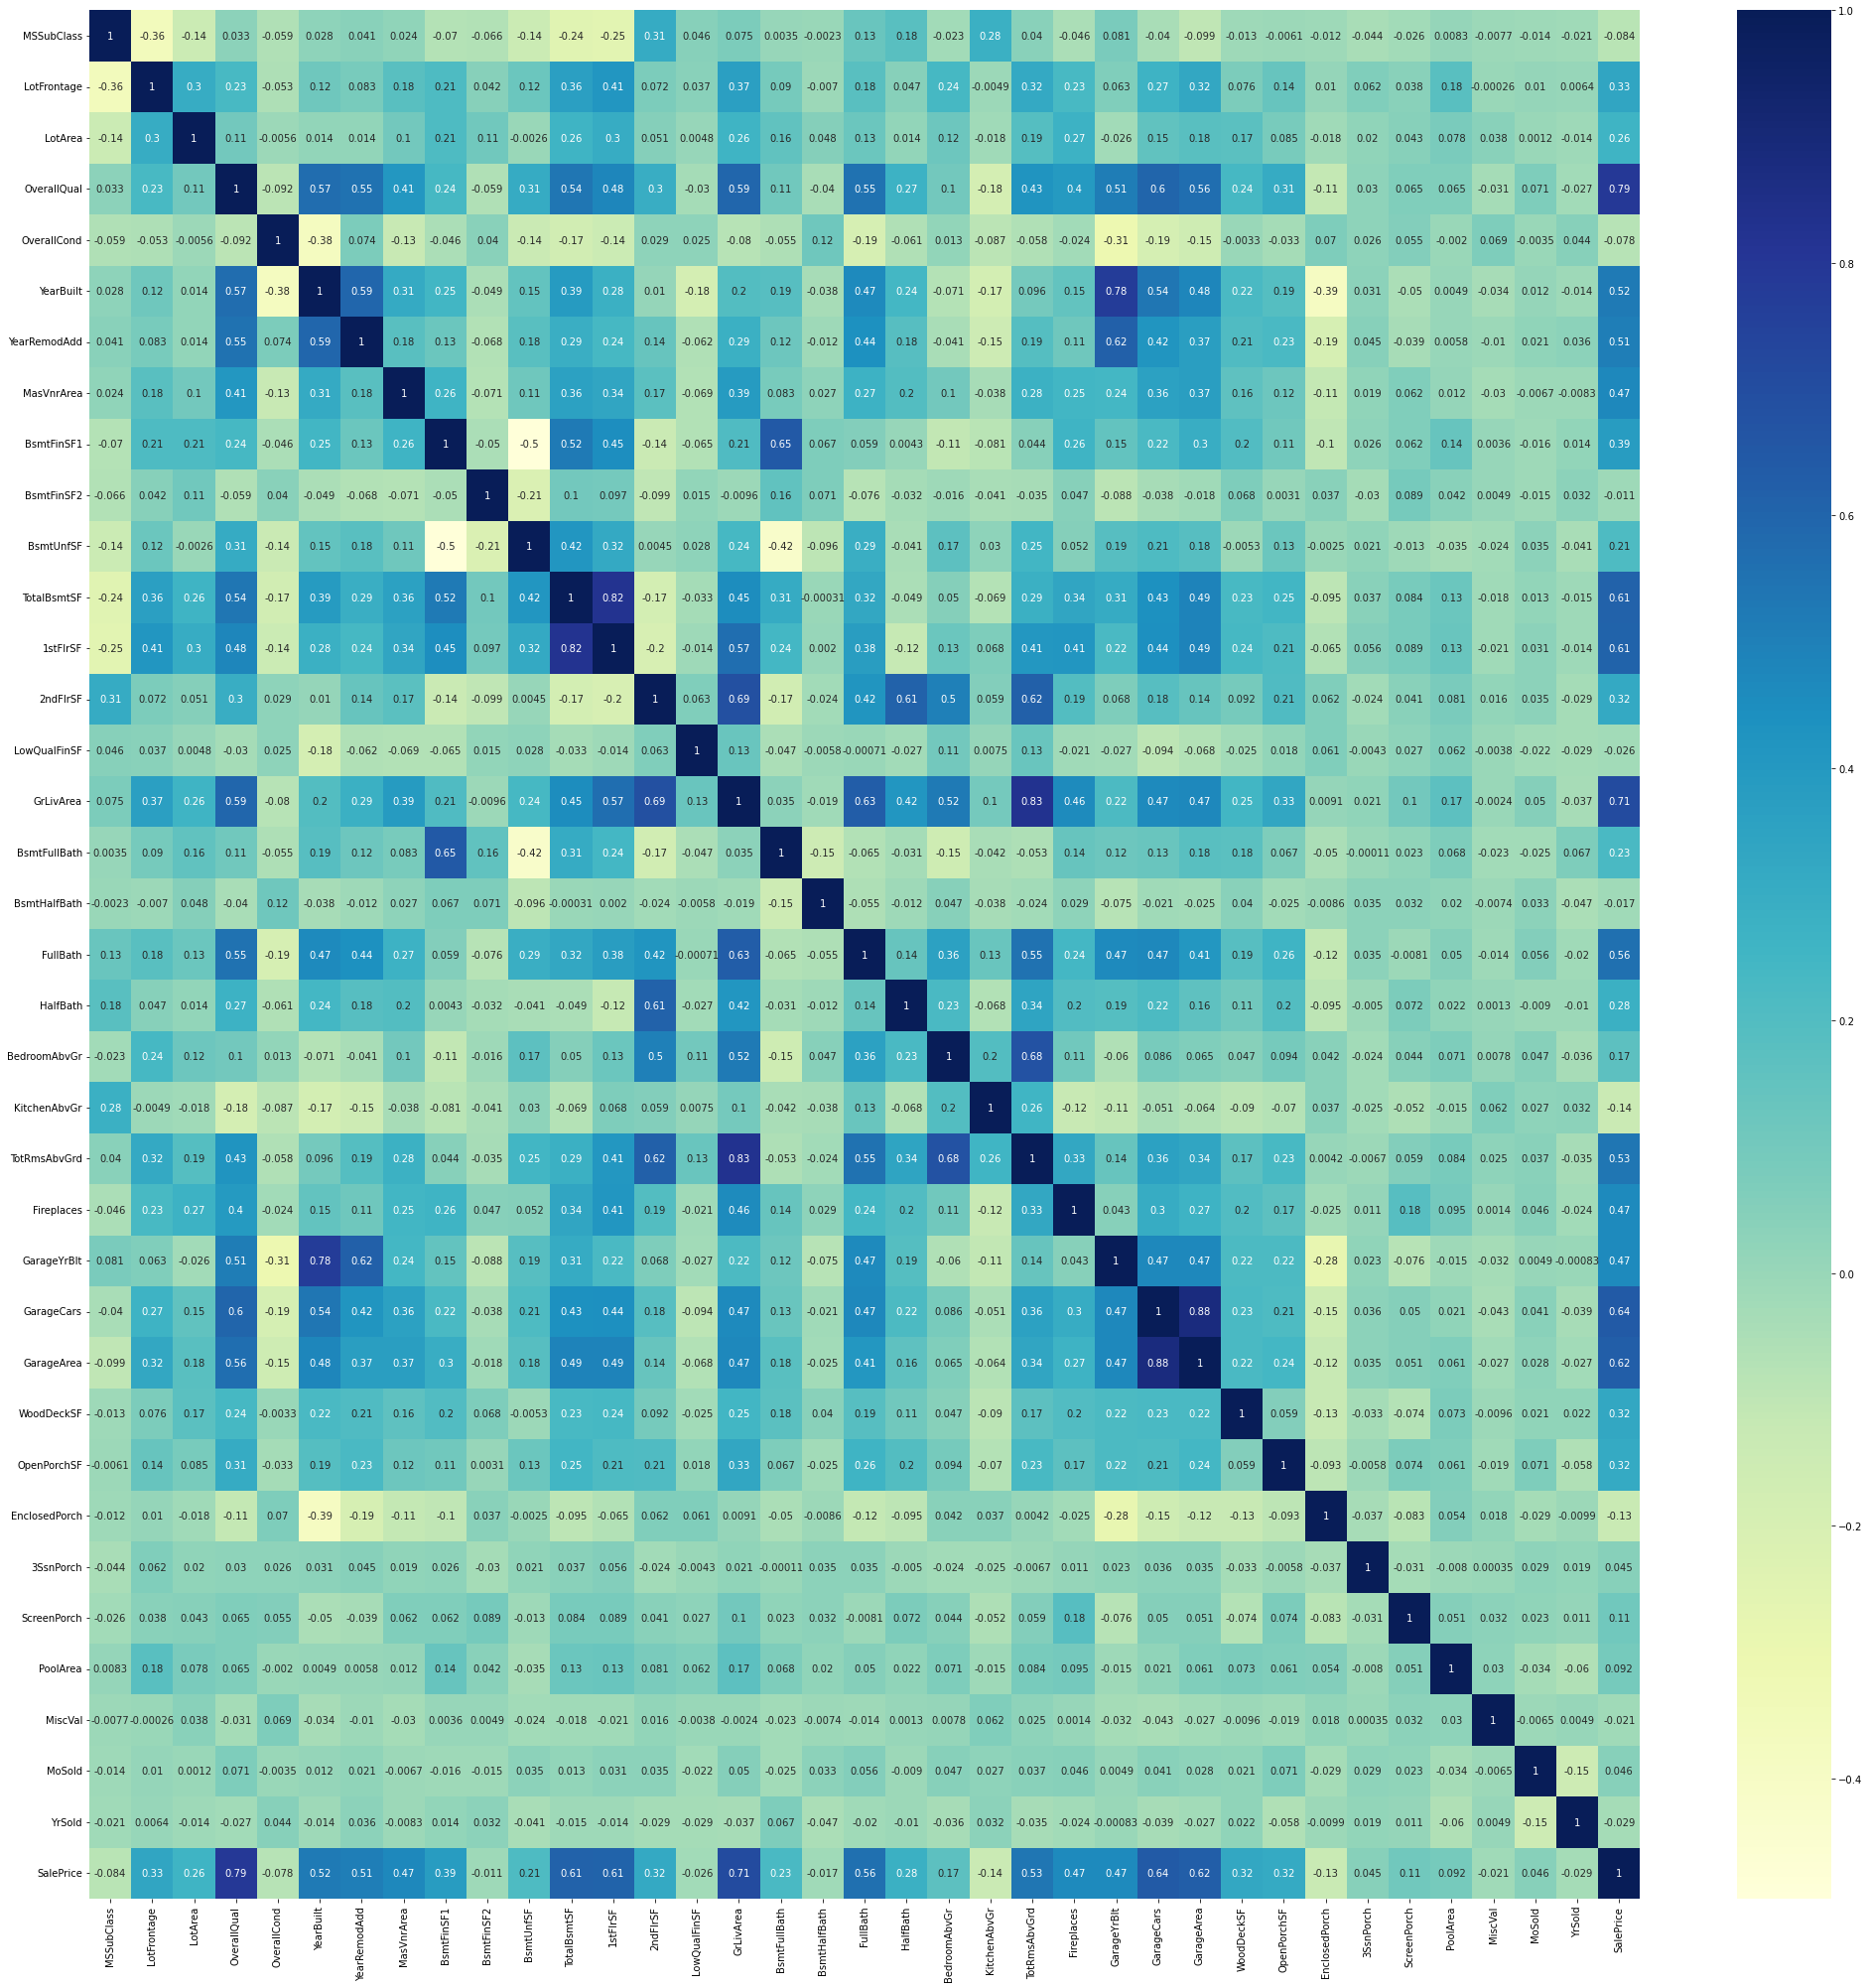

In [19]:
# Lets look at the corr heatmap for numerical variable
plt.figure(figsize=(35,35))
sns.heatmap(housing_df.select_dtypes(include=['float64', 'int64']).corr(), cmap="YlGnBu", annot=True)
plt.show()

### We can see many variables are correlated.
 - E.g. 
    - SalePrice is postively correlated with OverallQual - 0.79
    - SalePrice is postively correlated with GrLivArea - 0.71
    - YearBuilt is postively correlated with GarageYrBlt - 0.78 and so on

### As we need to predict SalePrice we should look for variables which are highly correlated with it. 

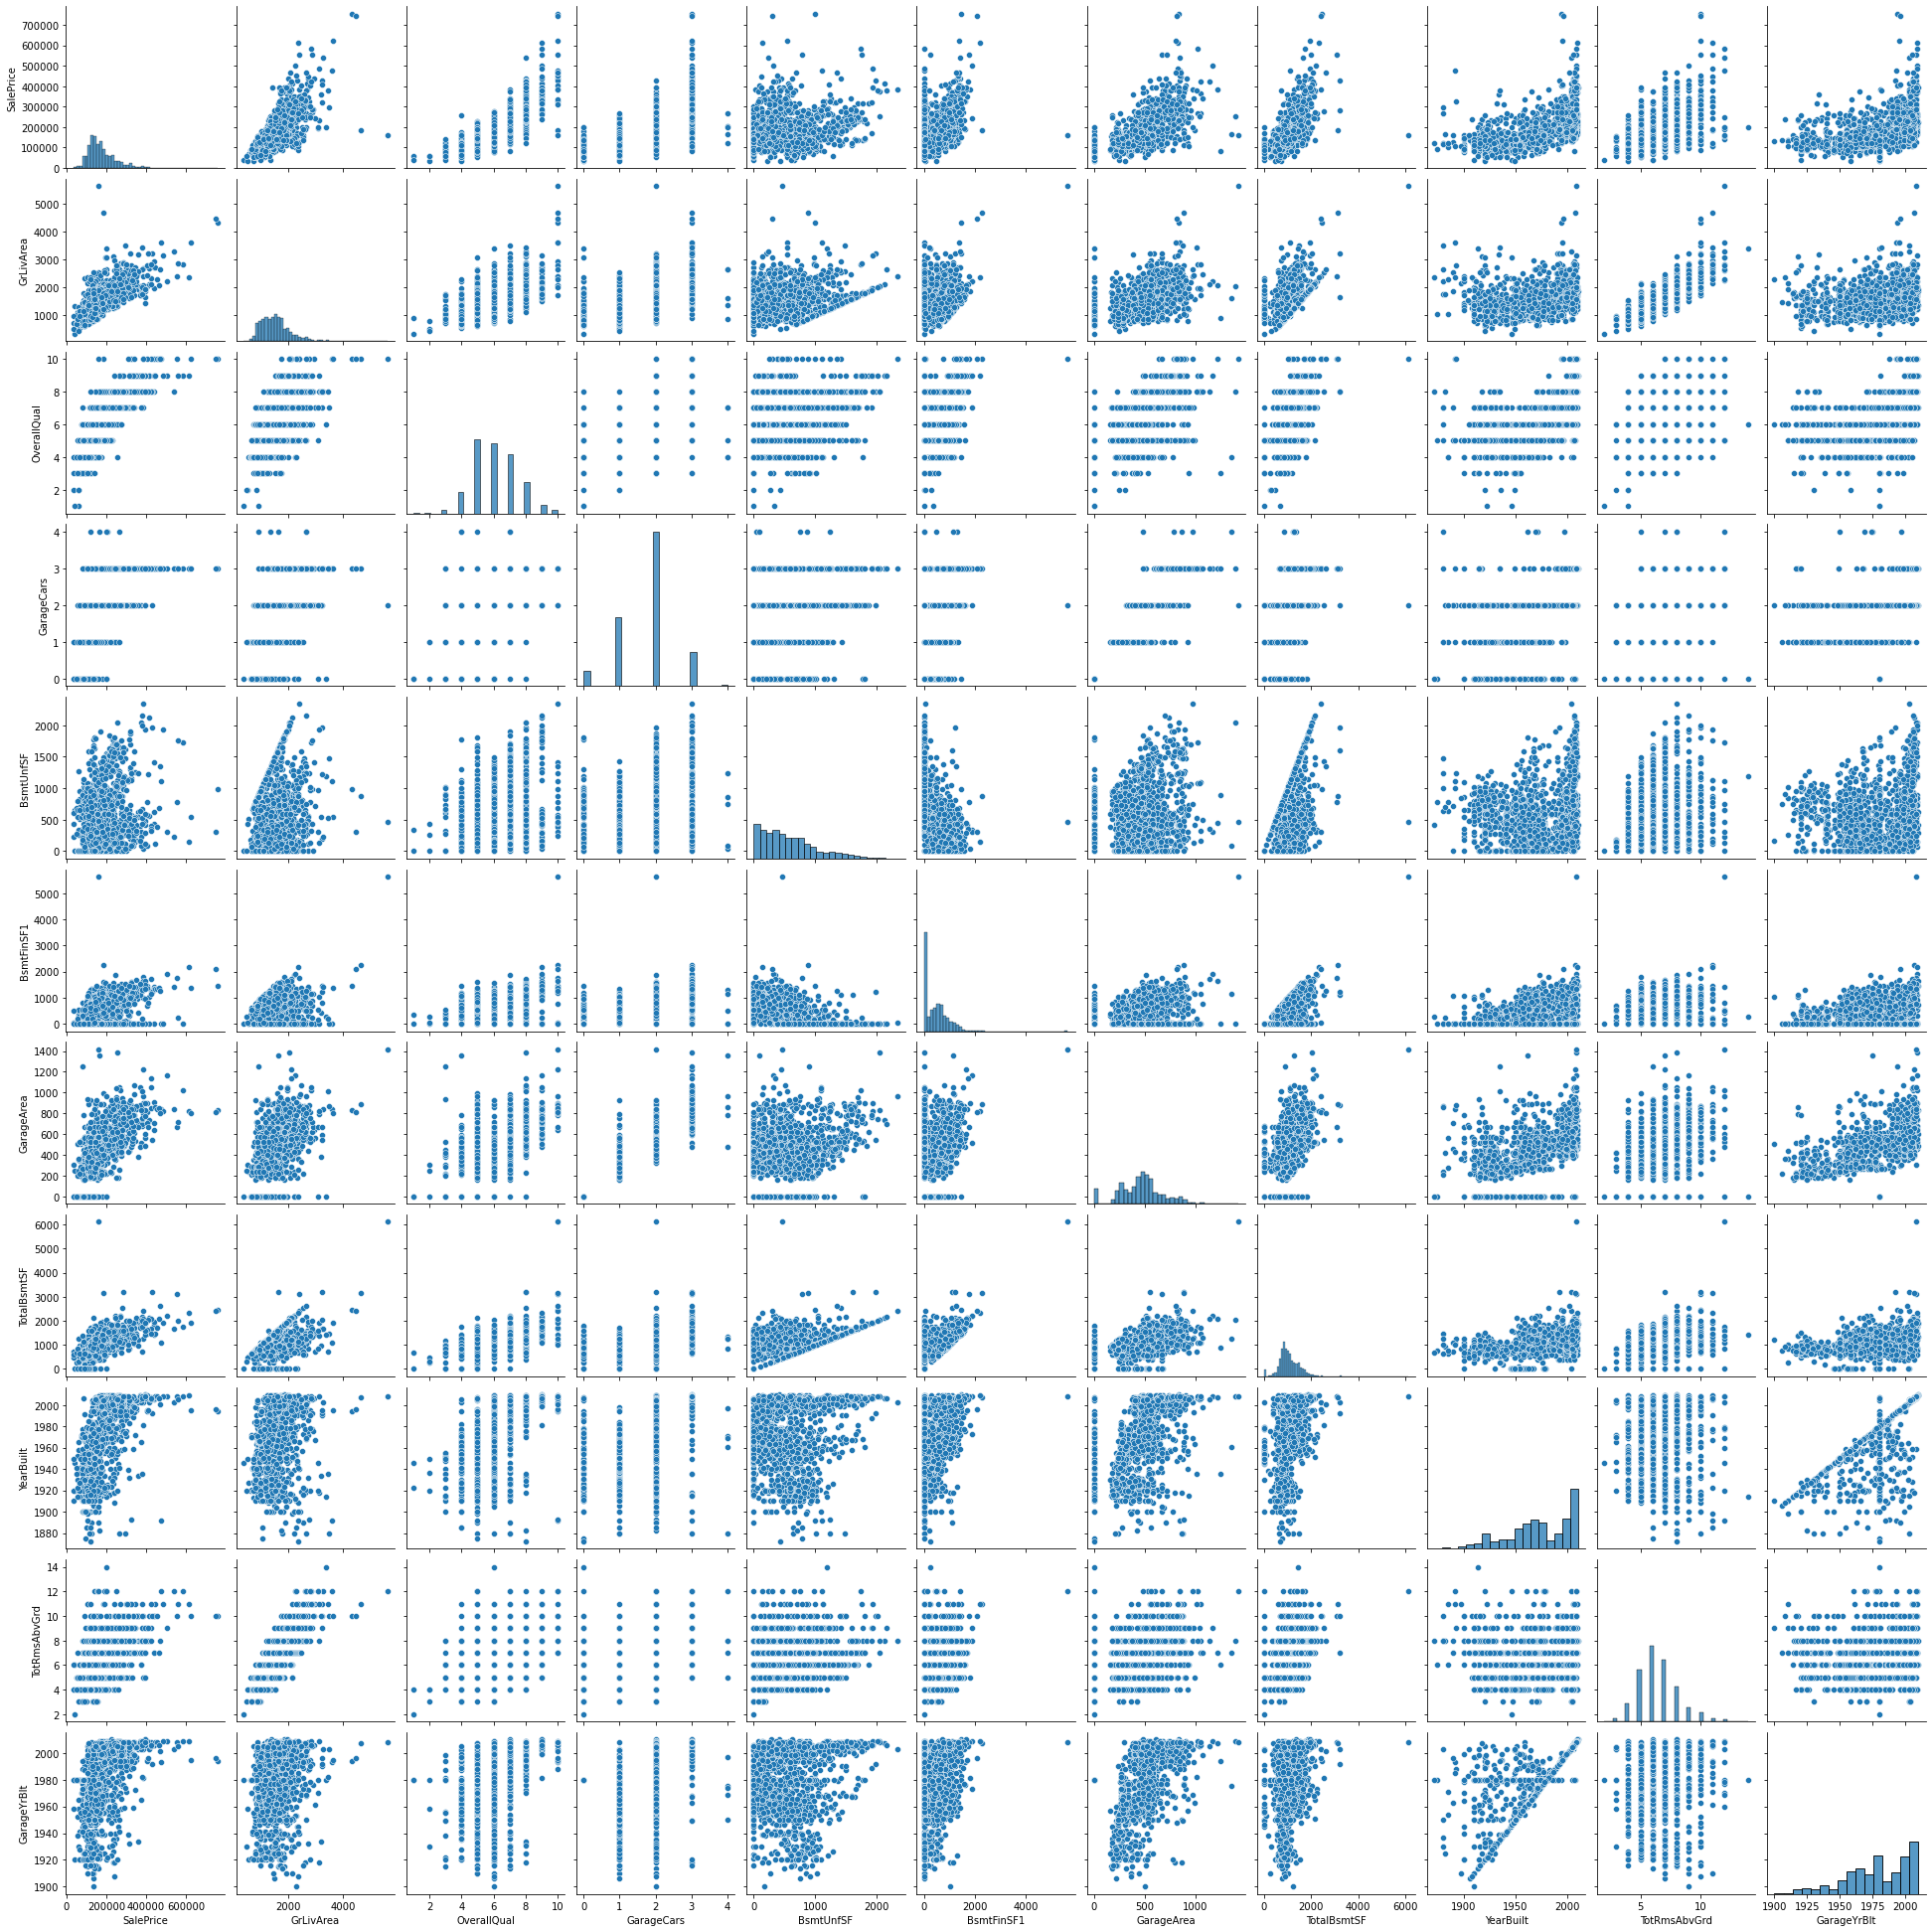

In [20]:
# Lets create pairplot to understand each one better
# sns.set()
cols = ['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_df[cols])
plt.show()

### Lets focus on Outliers now and treat them

In [21]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [22]:
# Original number of records
housing_df.shape

(1460, 80)

In [23]:
# After removal of outliers
housing_df = remove_outliers(housing_df, housing_df.select_dtypes(exclude=['object']))

In [24]:
housing_df.shape

(1439, 80)

### Generally anyone who buys a property is intereseted in knowing the age of property. So it can be a good indicator of SalePrice.

In [25]:
# Creating a derived column for age of property.
housing_df['PropertyAge'] = housing_df['YrSold'] - housing_df['YearBuilt']

In [26]:
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,none,none,none,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,none,none,none,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,none,none,none,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,none,none,none,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,none,none,none,0,12,2008,WD,Normal,250000,8


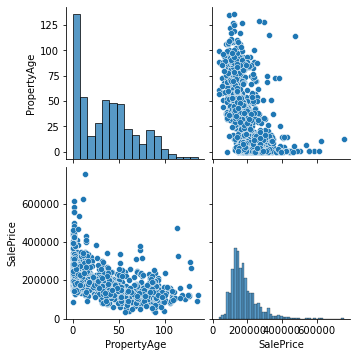

In [27]:
# Lets see its scatter plot against SalePrice to validate our assumption that it matters.
sns.pairplot(housing_df[['PropertyAge', 'SalePrice']])
plt.show()

In [28]:
# Dropping features which will not be needed now due to derived column PropertyAge.
housing_df = housing_df.drop(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)

In [29]:
housing_df.shape

(1439, 77)

## We can clearly see as the property age increases the SalePrice decreases.

### To clean/drop the data further we will drop columns which have higher percentage for a specific value. Because prediction will be inclined towards that. There is nothing wrong as data is like that but we can make those columns as constants and move further. Ideally such a decision should be made after discussing with client.

In [30]:
for col in housing_df:
    print (col)
    print(housing_df[col].value_counts())

MSSubClass
20     528
60     296
50     142
120     87
30      69
160     63
70      59
80      56
90      50
190     28
85      20
75      15
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1131
RM          217
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage
69.0     263
60.0     141
70.0      69
80.0      68
50.0      57
        ... 
174.0      1
38.0       1
112.0      1
140.0      1
46.0       1
Name: LotFrontage, Length: 107, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
10289     1
12243     1
1526      1
9490      1
9717      1
Name: LotArea, Length: 1055, dtype: int64
Street
Pave    1434
Grvl       5
Name: Street, dtype: int64
Alley
none    1348
Grvl      50
Pave      41
Name: Alley, dtype: int64
LotShape
Reg    915
IR1    478
IR2     38
IR3      8
Name: LotShape, dtype: int64
LandContour
Lvl    1296
Bnk      62
HLS      48
Low      33
Name: LandContour, d

In [31]:
# Some of these columns that I am selecting to drop (Note some columns like PoolQC, MiscFeature etc.
# were imputed initially to fill na values. We could have deleted it at that point of time too.)
columns_to_drop = ['PoolQC','MiscVal', 'Alley', 'Street', 'Utilities', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional']

In [32]:
housing_df = housing_df.drop(columns_to_drop, axis=1)

In [33]:
housing_df.shape

(1439, 66)


## Data Preparation/Scaling for Modelling 

In [34]:
# Lets look at the data first
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,250000,8


### We will need list of numerical variables for Scaling later. I realized it later after creating dummy variables - it exploded the count. Hence creating here.

In [35]:
num_vars = housing_df.dtypes[(housing_df.dtypes == 'int64') | (housing_df.dtypes == 'float64')].index
categorical_vars = housing_df.dtypes[(housing_df.dtypes == 'object')].index
print('Numerical variables')
print(num_vars)
print('Categorical variables')
print(categorical_vars)

Numerical variables
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice', 'PropertyAge'],
      dtype='object')
Categorical variables
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', '

### Dummy variables for categorical variables 
- Our dataset is a combination of both Categorical and numerical variables. Creating dummy variables for categorical variables only.

In [36]:
housing_df = pd.get_dummies(housing_df, drop_first=True )
housing_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [37]:
housing_df.shape

(1439, 215)

### It looks like our features count got exploded making it a complex model (based on number of features - May be at this point too we should discuss with clients and drop any features if possible).

### Test and train split

In [38]:
# Lets have 70% data for train and 30% for test
df_train, df_test = train_test_split(housing_df, train_size=0.7, random_state=75)
print(df_train.shape)
print(df_test.shape)

(1007, 215)
(432, 215)


### Rescaling of the variables
- I will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [39]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
# So all numberic values are now between 0 and 1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
616,0.235294,0.298137,0.094456,0.555556,0.50,0.000000,0.202212,0.0,0.151417,0.244230,...,0,0,0,0,1,0,0,0,1,0
1381,0.000000,0.298137,0.167360,0.555556,0.75,0.000000,0.382743,0.0,0.157919,0.375858,...,0,0,0,0,1,0,0,0,1,0
782,0.000000,0.285714,0.215733,0.666667,0.50,0.000000,0.000000,0.0,0.656294,0.440736,...,0,0,0,0,1,0,0,0,1,0
864,0.000000,0.316770,0.105671,0.666667,0.50,0.000000,0.000000,0.0,0.637250,0.427948,...,0,0,1,0,0,0,0,0,0,1
1142,0.235294,0.347826,0.124746,0.777778,0.50,0.246734,0.508850,0.0,0.146772,0.457268,...,0,0,1,0,0,0,0,0,0,1


In [40]:
# just checking the count of numerical variables
len(num_vars)

33

In [41]:
df_train[num_vars].describe()
# We can see max value is 1 in all cases

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropertyAge
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,...,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000
mean,0.218617,0.298087,0.124769,0.563279,0.568024,0.073047,0.192472,0.031323,0.262420,0.326309,...,0.443644,0.340104,0.126042,0.083665,0.054978,0.007603,0.028656,0.0,0.199808,0.265735
std,0.251423,0.121941,0.080246,0.153945,0.137190,0.128362,0.189074,0.109591,0.205815,0.128864,...,0.187823,0.152134,0.166458,0.119108,0.153583,0.065923,0.107632,0.0,0.107852,0.223493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.242236,0.088071,0.444444,0.500000,0.000000,0.000000,0.000000,0.100790,0.248284,...,0.250000,0.241727,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.131648,0.051471
50%,0.176471,0.298137,0.115892,0.555556,0.500000,0.000000,0.168584,0.000000,0.218300,0.308796,...,0.500000,0.344604,0.000000,0.043876,0.000000,0.000000,0.000000,0.0,0.177198,0.250000
75%,0.294118,0.354037,0.145693,0.666667,0.625000,0.116110,0.315044,0.000000,0.378309,0.398160,...,0.500000,0.414388,0.228261,0.123400,0.000000,0.000000,0.000000,0.0,0.246563,0.397059
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## Training the model

In [42]:
# Lets have X_train and y_train
y_train = df_train.pop('SalePrice')
X_train = df_train
print(X_train.head())
print(y_train.head())

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
616     0.235294     0.298137  0.094456     0.555556         0.50    0.000000   
1381    0.000000     0.298137  0.167360     0.555556         0.75    0.000000   
782     0.000000     0.285714  0.215733     0.666667         0.50    0.000000   
864     0.000000     0.316770  0.105671     0.666667         0.50    0.000000   
1142    0.235294     0.347826  0.124746     0.777778         0.50    0.246734   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
616     0.202212         0.0   0.151417     0.244230  ...               0   
1381    0.382743         0.0   0.157919     0.375858  ...               0   
782     0.000000         0.0   0.656294     0.440736  ...               0   
864     0.000000         0.0   0.637250     0.427948  ...               0   
1142    0.508850         0.0   0.146772     0.457268  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  

In [43]:
X_train.shape

(1007, 214)

In [44]:
y_train.shape

(1007,)

## Starting with RFE first to get the features

In [45]:
# For RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE with the output number of variables = 60 (I really don't know about this number, may be with multiple
# trial and error this number should be tuned. Also after that we should consult to client for confirmation.)
rfe = RFE(lm, n_features_to_select=60)
rfe = rfe.fit(X_train, y_train)

In [46]:
# To get ranking of features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 99),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 151),
 ('BsmtHalfBath', False, 154),
 ('FullBath', False, 79),
 ('HalfBath', False, 137),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 10),
 ('GarageYrBlt', False, 147),
 ('GarageCars', True, 1),
 ('GarageArea', False, 115),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 11),
 ('EnclosedPorch', False, 101),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 39),
 ('PoolArea', True, 1),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', False, 3),
 ('MSZoning_RM', False, 4),
 ('LotShape_IR2', Fal

In [47]:
# taking features for which rfe support is True.
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', '3SsnPorch', 'PoolArea', 'PropertyAge',
       'MSZoning_FV', 'MSZoning_RH', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_PosN', 'Condition1_RRAe', 'BldgType_2fmCon',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Foundation_Stone',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_none',
       'BsmtCond_Po', 'BsmtCond_none', 'BsmtExposure_Gd', 'BsmtFinType1_none',
       'BsmtFinType2_none', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 

In [48]:
# features for which rfe support is False.
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=154)

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Po,GarageQual_none,MiscFeature_Shed,MiscFeature_none,SaleType_Oth
616,0.235294,0.094456,0.555556,0.50,0.000000,0.202212,0.0,0.151417,0.244230,0.132258,...,0,0,0,0,0,0,0,0,1,0
1381,0.000000,0.167360,0.555556,0.75,0.000000,0.382743,0.0,0.157919,0.375858,0.601792,...,0,0,0,0,0,0,0,0,1,0
782,0.000000,0.215733,0.666667,0.50,0.000000,0.000000,0.0,0.656294,0.440736,0.355556,...,0,0,0,0,0,0,0,0,1,0
864,0.000000,0.105671,0.666667,0.50,0.000000,0.000000,0.0,0.637250,0.427948,0.334767,...,0,0,0,0,0,0,0,0,1,0
1142,0.235294,0.124746,0.777778,0.50,0.246734,0.508850,0.0,0.146772,0.457268,0.368459,...,1,0,0,0,0,0,0,0,1,0


In [50]:
X_train_rfe.shape

(1007, 60)

### Lets do prediction with 1st model given using RFE

In [51]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9235445085051316

In [52]:
# for test data
# Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()
# So all numberic values are now between 0 and 1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
653,0.176471,0.242236,0.129857,0.555556,0.75,0.000000,0.000000,0.0,0.351138,0.235808,...,0,0,0,0,1,0,0,0,1,0
804,0.000000,0.335404,0.110854,0.444444,0.50,0.000000,0.359292,0.0,0.057594,0.291953,...,0,0,0,0,1,0,0,1,0,0
849,0.352941,0.366460,0.119492,0.555556,0.75,0.261248,0.000000,0.0,0.245239,0.164691,...,0,0,0,0,1,0,0,0,1,0
437,0.147059,0.180124,0.067664,0.555556,0.75,0.000000,0.000000,0.0,0.410590,0.275733,...,0,0,0,0,1,0,0,0,1,0
370,0.235294,0.298137,0.098199,0.555556,0.50,0.000000,0.000000,0.0,0.442638,0.297255,...,0,0,0,0,1,0,0,0,1,0


In [53]:
df_test.shape

(432, 215)

In [54]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [55]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-5.588016820542848e+16

## Here test r2 score (-5.679714850806905e+19) is very low as compared to train (close to 92%). So clearly this model doesn't seem to be correct. It is mostly the case of overfitting.

## Lets using Lasso and Ridge Regression

# Lasso Regression

In [56]:
X_train.shape

(1007, 214)

In [57]:
y_train.shape

(1007,)

In [58]:
# alphas values to tune - high alpha - underfiiting, low - overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [59]:
# Lasso object
lasso = Lasso()

# cross validation with 5 folds
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Checking alpha value
model_cv.best_params_

{'alpha': 0.0001}

In [61]:
alpha = 0.0001

In [62]:
lasso = Lasso(alpha=alpha)

In [63]:
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [64]:
cv_lasso_df = pd.DataFrame(model_cv.cv_results_)
cv_lasso_df['param_alpha'] = cv_lasso_df['param_alpha'].astype('float32')
cv_lasso_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046539,0.011325,0.002651,0.001189,0.0001,{'alpha': 0.0001},-0.022686,-0.023439,-0.022706,-0.022343,...,-0.023118,0.000741,1,-0.019644,-0.019675,-0.019674,-0.020087,-0.018313,-0.019478,0.000606
1,0.006210,0.000397,0.001894,0.000063,0.0010,{'alpha': 0.001},-0.027131,-0.027357,-0.028249,-0.023988,...,-0.027296,0.001893,2,-0.026906,-0.025835,-0.025278,-0.026188,-0.024734,-0.025788,0.000746
2,0.004163,0.000054,0.001894,0.000008,0.0100,{'alpha': 0.01},-0.056232,-0.048390,-0.053666,-0.046822,...,-0.051518,0.003453,3,-0.049798,-0.052066,-0.051111,-0.051866,-0.050633,-0.051095,0.000829
3,0.003810,0.000116,0.001937,0.000084,0.0500,{'alpha': 0.05},-0.082073,-0.075669,-0.079834,-0.071499,...,-0.077968,0.003880,4,-0.076686,-0.078808,-0.077768,-0.079632,-0.076768,-0.077932,0.001148
4,0.003833,0.000316,0.001872,0.000057,0.1000,{'alpha': 0.1},-0.082073,-0.075669,-0.079834,-0.071499,...,-0.077968,0.003880,4,-0.076686,-0.078808,-0.077768,-0.079632,-0.076768,-0.077932,0.001148


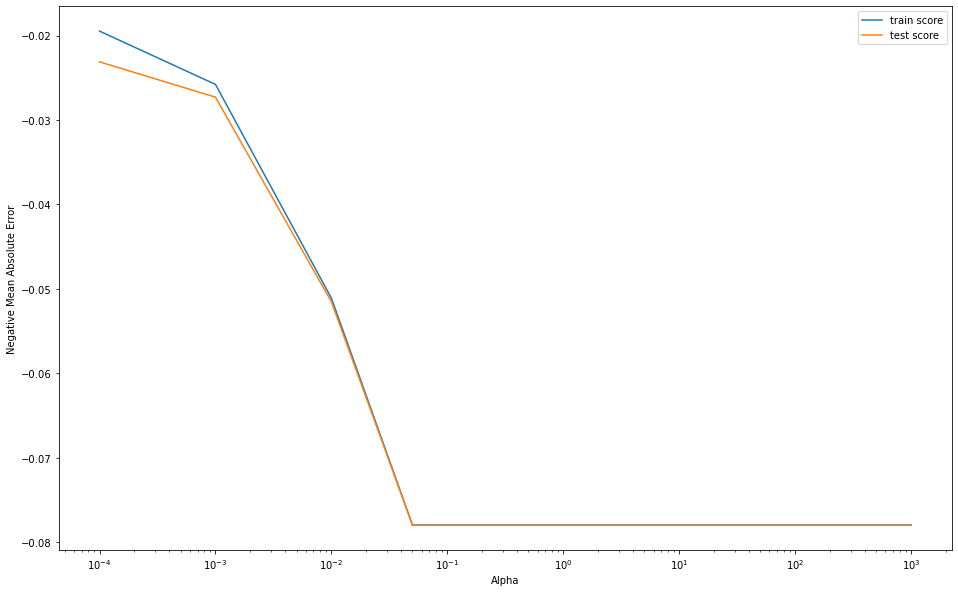

In [65]:
# Lets plot 
plt.figure(figsize=(16,10))
plt.plot(cv_lasso_df['param_alpha'],cv_lasso_df['mean_train_score'])
plt.plot(cv_lasso_df['param_alpha'],cv_lasso_df['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

## Here we can see Negative Mean Absolute Error becomes constant eventually.

In [66]:
# Lets do prediction for test data and train data
# train data
y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9131165881631454

In [67]:
# Prediction for test data 
y_pred_test = lasso.predict(X_test)
metrics.r2_score(y_test, y_pred_test)

0.8870943160044248

In [68]:
# Coefficients for Lasso are:
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature', 'Coef']

In [69]:
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Feature,Coef
4,OverallCond,0.099058
14,BsmtFullBath,0.090516
10,1stFlrSF,0.089995
12,LowQualFinSF,0.083371
11,2ndFlrSF,0.066404
5,MasVnrArea,0.063863
6,BsmtFinSF1,0.059968
70,Neighborhood_Timber,0.057222
63,Neighborhood_NridgHt,0.054987
7,BsmtFinSF2,0.050296


In [70]:
# Calculating all metrices such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metrics = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
lasso_metrics.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
lasso_metrics.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss_train_lr}")
lasso_metrics.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss_test_lr}")
lasso_metrics.append(rss_test_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
lasso_metrics.append(mse_train_lr**0.5)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
lasso_metrics.append(mse_test_lr**0.5)

r-squared train: 0.9131165881631454
r-squared test: 0.8870943160044248
rss train: 1.0166930890171617
rss test: 0.5866870988688985
mse train: 0.0010096257090537852
mse test: 0.0013580719881224502


### RMSE value is low which is good.

## Lets see for assumptions of Linear Regression

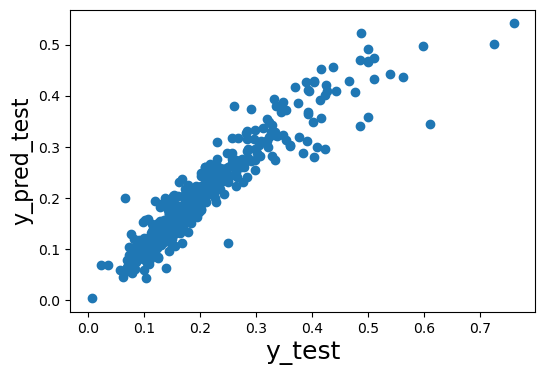

In [101]:
# y_test vs y_test_pred
fig = plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred_test', fontsize=16)  
plt.show()

### Distribution of errors should be Normal Distribution

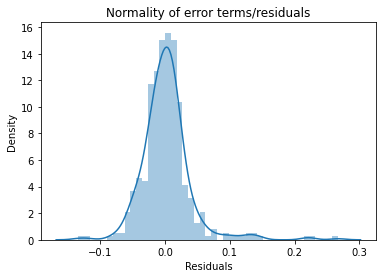

In [102]:
sns.distplot((y_test - y_pred_test))
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### This is a normal distribution.

## Lasso regression results
 - R2 Score
    - Train: close to 0.9131
    - Test: close to 0.8871
 - alpha value: 0.0001
 - Top 10 predictors for SalePrice are
   - OverallCond, BsmtFullBath, 1stFlrSF, LowQualFinSF, 2ndFlrSF, MasVnrArea, BsmtFinSF1, Neighborhood_Timber, Neighborhood_NridgHt, BsmtFinSF2

## Ridge Regression

In [71]:
# Ridge object
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)  

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# Checking alpha value
model_cv.best_params_

{'alpha': 5.0}

In [73]:
alpha = 5.0

In [74]:
ridge = Ridge(alpha=alpha)

In [75]:
ridge.fit(X_train, y_train) 

Ridge(alpha=5.0)

In [77]:
cv_ridge_df = pd.DataFrame(model_cv.cv_results_)
cv_ridge_df['param_alpha'] = cv_lasso_df['param_alpha'].astype('float32')
cv_ridge_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007167,0.001319,0.003299,0.000713,0.0001,{'alpha': 0.0001},-0.026777,-0.025602,-0.023968,-0.026047,...,-0.026102,0.001366,24,-0.018401,-0.018697,-0.018976,-0.019151,-0.016999,-0.018445,0.000766
1,0.004615,0.000538,0.002324,0.000474,0.0010,{'alpha': 0.001},-0.026774,-0.025583,-0.023963,-0.026035,...,-0.026092,0.001365,23,-0.018401,-0.018697,-0.018975,-0.019151,-0.017000,-0.018445,0.000766
2,0.004957,0.000865,0.002165,0.000180,0.0100,{'alpha': 0.01},-0.026748,-0.025478,-0.023912,-0.025936,...,-0.026013,0.001354,22,-0.018400,-0.018698,-0.018970,-0.019154,-0.017009,-0.018446,0.000762
3,0.006218,0.000903,0.003147,0.000219,0.0500,{'alpha': 0.05},-0.026616,-0.025231,-0.023778,-0.025671,...,-0.025777,0.001288,21,-0.018396,-0.018704,-0.018960,-0.019166,-0.017041,-0.018453,0.000752
4,0.005847,0.000634,0.002788,0.000408,0.1000,{'alpha': 0.1},-0.026470,-0.025055,-0.023639,-0.025475,...,-0.025571,0.001227,20,-0.018399,-0.018713,-0.018962,-0.019186,-0.017072,-0.018466,0.000745


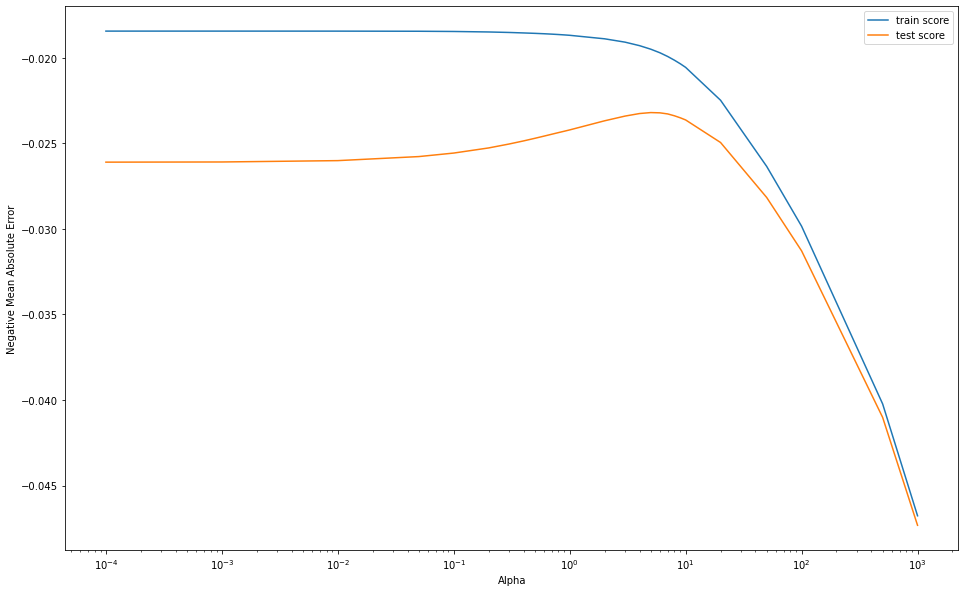

In [79]:
# Lets plot 
plt.figure(figsize=(16,10))
plt.plot(cv_ridge_df['param_alpha'],cv_ridge_df['mean_train_score'])
plt.plot(cv_ridge_df['param_alpha'],cv_ridge_df['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
# Lets do prediction for test data and train data
# train data
y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.914111281456612

In [81]:
# Prediction for test data 
y_pred_test = ridge.predict(X_test)
metrics.r2_score(y_test, y_pred_test)

0.8759890437720965

In [82]:
# Coefficients for Ridge are:
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature', 'Coef']

In [88]:
ridge_coef.sort_values(by='Coef',ascending=False).head(15)

,Feature,Coef
4,OverallCond,0.068843
14,BsmtFullBath,0.062650
12,LowQualFinSF,0.061787
11,2ndFlrSF,0.055035
7,BsmtFinSF2,0.051291
6,BsmtFinSF1,0.051056
63,Neighborhood_NridgHt,0.050705
10,1stFlrSF,0.050613
70,Neighborhood_Timber,0.047782
5,MasVnrArea,0.044772


In [89]:
# Calculating all metrices such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metrics = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
ridge_metrics.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print(f"r-squared test: {r2_test_lr}")
ridge_metrics.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss train: {rss_train_lr}")
ridge_metrics.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss test: {rss_test_lr}")
ridge_metrics.append(rss_test_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print(f"mse train: {mse_train_lr}")
ridge_metrics.append(mse_train_lr**0.5)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print(f"mse test: {mse_test_lr}")
ridge_metrics.append(mse_test_lr**0.5)

r-squared train: 0.914111281456612
r-squared test: 0.8759890437720965
rss train: 1.005053378101364
rss test: 0.6443929620067484
mse train: 0.0009980669097332314
mse test: 0.0014916503750156214


### RMSE value is low which is good.

## Ridge regression results
 - R2 Score
    - Train: close to 0.9141
    - Test: close to 0.8759
 - alpha value: 5.0
 - Top 10 predictors for SalePrice are
   - OverallCond, BsmtFullBath, LowQualFinSF, 2ndFlrSF, BsmtFinSF2, BsmtFinSF1, Neighborhood_NridgHt, 1stFlrSF, Neighborhood_Timber and MasVnrArea 

In [93]:
# Lets look at the data for all 2 models together 
data = pd.DataFrame(index=['Train R2 score', 'Test R2 score', 'Train RSS', 'Test RSS', 'Train MSE', 'Test MSE'], 
                     columns = ['Ridge', 'Lasso'])
data['Ridge'] = ridge_metrics 
data['Lasso'] = lasso_metrics
data

,Ridge,Lasso
Train R2 score,0.914111,0.913117
Test R2 score,0.875989,0.887094
Train RSS,1.005053,1.016693
Test RSS,0.644393,0.586687
Train MSE,0.031592,0.031775
Test MSE,0.038622,0.036852


## In this case both Ridge and Lasso seems to be performing similar (Lasso is having better results for test dataset)

### Since Lasso model provided better result (R2 score) on test data we will consider as our final model.

### Coefficients for both Lasso and Ridge

In [106]:
data = pd.DataFrame(index=X_train.columns)
data.rows = X_train.columns
data['Lasso'] = lasso.coef_
data['Ridge'] = ridge.coef_
data.head(50)

,Lasso,Ridge
MSSubClass,-0.020791,-0.022702
LotFrontage,0.000000,0.002621
LotArea,0.034491,0.028479
OverallQual,0.099058,0.068843
OverallCond,0.063863,0.044772
MasVnrArea,0.059968,0.051056
BsmtFinSF1,0.050296,0.051291
BsmtFinSF2,0.008262,0.013966
BsmtUnfSF,-0.000000,0.011965
TotalBsmtSF,0.089995,0.050613


## Final result
 - Some variables are positively correlated while some are negatively correlated with SalePrice.
 - For Lasso significant variables are
   - Positively correlated: LotArea, OverallQual, OverallCond, MasVnrArea, BsmtFinSF1, 1stFlrSF, 2ndFlrSF, GrLivArea
   - Negatively correlated: MSSubClass, TotRmsAbvGrd, PropertyAge, LotConfig_FR2

## Answers to three questions from assignment

### Q 1. Which variables are significant in predicting the price of a house?

Ans - Some variables are positively correlated while some are negatively correlated with SalePrice.
      
      - Positively correlated: LotArea, OverallQual, OverallCond, MasVnrArea, BsmtFinSF1, 1stFlrSF, 2ndFlrSF,GrLivArea
      - Negatively correlated: MSSubClass, TotRmsAbvGrd, PropertyAge, LotConfig_FR2

### Q.2 How well those variables describe the price of a house?

Ans - R2 Score(Lasso) for train and test dataset are: 0.913117 and 0.887094 respectively.

### Q.3 Determine the optimal value of lambda for ridge and lasso regression.

Ans - Optimal value of lambda for ridge and lasso regression is 5.0 and 0.0001 respectively.